In [1]:
import data

In [2]:

TICKERS = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
START = '2015-01-01'
END = '2025-01-01'

# full pipeline in one call
df = data.load_dataset(TICKERS, start=START, end=END)
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
/home/jake/test/ml-market/tmp/data.py:357: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df["beta_spy_20"] = df.groupby("ticker", group_keys=False).apply(rolling_beta)


,date,ticker,open,high,low,close,volume,return_1d,return_2d,return_3d,...,beta_spy_20_lag_1d,beta_spy_20_lag_2d,beta_spy_20_lag_3d,beta_spy_20_lag_5d,beta_spy_20_lag_10d,rsi_delta_1d,rsi_delta_2d,rsi_delta_3d,rsi_delta_5d,rsi_delta_10d
0,2015-10-16,AAPL,25.095493,25.144885,24.814858,24.929358,156930400,-0.007331,0.007531,-0.006709,...,0.539534,0.504295,0.480279,0.494343,0.833134,-2.188868,2.594937,-1.513188,-2.288799,3.248779
1,2015-10-16,AMZN,28.263500,28.547001,28.015499,28.538000,86316000,0.014793,0.047593,0.039825,...,1.266727,1.161442,1.145384,1.121136,1.183356,2.544386,8.847500,6.647781,9.708880,10.634382
2,2015-10-16,GOOGL,34.531833,34.572552,34.218992,34.527859,36316000,0.003319,0.021913,0.017785,...,1.059297,1.036643,1.003459,1.087176,1.044487,0.785451,5.423471,3.730279,8.316057,12.682830
3,2015-10-16,MSFT,40.895572,41.347842,40.791203,41.321747,26450300,0.010637,0.017781,0.013223,...,0.860763,0.919702,0.901755,0.960615,1.062715,2.977090,5.079428,2.897540,0.705607,6.319750
4,2015-10-19,AAPL,24.875480,25.088762,24.720569,25.084272,119036800,0.006214,-0.001162,0.013792,...,0.581513,0.539534,0.504295,0.525616,0.789625,2.032018,-0.156851,4.626955,1.049922,4.240526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9245,2024-12-26,AMZN,228.500000,228.500000,226.669998,227.050003,16146700,-0.008732,0.008842,0.009470,...,1.657960,1.735280,1.766086,1.786235,2.427393,-2.835317,0.758749,0.887523,4.833937,-13.628307
9246,2024-12-26,GOOGL,194.515836,196.110643,193.748349,194.964386,12046600,-0.002601,0.004984,0.021890,...,1.407230,1.544826,1.478032,1.271336,1.176669,-0.816296,0.377488,3.063537,5.742235,-10.303447
9247,2024-12-26,MSFT,435.864723,437.711119,433.432682,434.901825,8194200,-0.002777,0.006571,0.003459,...,1.042137,1.072752,1.135580,1.246092,1.381275,-1.298037,2.552059,1.242198,0.525625,-16.854861
9248,2024-12-27,AAPL,256.669129,257.535238,251.920617,254.439224,42355300,-0.013242,-0.010109,0.001254,...,0.638160,0.641951,0.660637,0.580011,0.234327,-8.826623,-8.124023,-5.459382,0.414431,-7.857997


In [3]:
# Get feature columns
cols = data.get_test_feature_columns(df)
X = df[cols['features']].dropna(axis=1)
y = df['target_up_1d']

X.columns.tolist()

['return_1d',
 'return_2d',
 'return_3d',
 'return_5d',
 'return_10d',
 'return_lag_1',
 'return_lag_2',
 'return_lag_3',
 'return_lag_5',
 'return_lag_10',
 'momentum_rsi_14',
 'momentum_stoch_k',
 'volatility_realized_20',
 'volume_change_1d',
 'volume_change_2d',
 'volume_change_3d',
 'volume_change_5d',
 'volume_change_10d',
 'stats_skewness_20',
 'stats_kurtosis_20',
 'macro_xlk_return_1d',
 'macro_xlk_return_2d',
 'macro_xlk_return_3d',
 'macro_xlk_return_5d',
 'macro_xlk_return_10d',
 'macro_spy_return_1d',
 'macro_spy_return_2d',
 'macro_spy_return_3d',
 'macro_spy_return_5d',
 'macro_spy_return_10d',
 'macro_qqq_return_1d',
 'macro_qqq_return_2d',
 'macro_qqq_return_3d',
 'macro_qqq_return_5d',
 'macro_qqq_return_10d',
 'macro_tlt_return_1d',
 'macro_tlt_return_2d',
 'macro_tlt_return_3d',
 'macro_tlt_return_5d',
 'macro_tlt_return_10d',
 'macro_dxy_return_1d',
 'macro_dxy_return_2d',
 'macro_dxy_return_3d',
 'macro_dxy_return_5d',
 'macro_dxy_return_10d',
 'macro_vix_return_1

In [4]:
# =============================================================================
# Walk-Forward Validation
# =============================================================================
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Sort by date
df_sorted = df.sort_values('date').reset_index(drop=True)

# Walk-forward parameters
TRAIN_YEARS = 5  # Initial training window
TEST_MONTHS = 3  # Test window (step forward)
MIN_TRAIN_SAMPLES = 1000

# Get unique dates
dates = df_sorted['date'].unique()
min_date = pd.Timestamp(dates.min())
max_date = pd.Timestamp(dates.max())

print(f"Data range: {min_date.date()} to {max_date.date()}")
print(f"Train window: {TRAIN_YEARS} years, Test window: {TEST_MONTHS} months")
print()

# Generate walk-forward splits
splits = []
train_end = min_date + pd.DateOffset(years=TRAIN_YEARS)

while train_end < max_date:
    test_end = train_end + pd.DateOffset(months=TEST_MONTHS)
    if test_end > max_date:
        test_end = max_date
    
    train_mask = df_sorted['date'] < train_end
    test_mask = (df_sorted['date'] >= train_end) & (df_sorted['date'] < test_end)
    
    if train_mask.sum() >= MIN_TRAIN_SAMPLES and test_mask.sum() > 0:
        splits.append({
            'train_end': train_end,
            'test_start': train_end,
            'test_end': test_end,
            'train_idx': df_sorted[train_mask].index.tolist(),
            'test_idx': df_sorted[test_mask].index.tolist()
        })
    
    train_end = test_end

print(f"Number of walk-forward folds: {len(splits)}")
for i, split in enumerate(splits):
    print(f"  Fold {i+1}: Train up to {split['train_end'].date()}, Test {split['test_start'].date()} to {split['test_end'].date()} ({len(split['test_idx'])} samples)")
print()

# Target columns to predict
targets = ['target_return_1d', 'target_return_5d', 'target_return_10d']
all_predictions = {t: [] for t in targets}
all_actuals = {t: [] for t in targets}
all_dates = []
all_tickers = []

# Walk-forward training
for fold_idx, split in enumerate(splits):
    print(f"Fold {fold_idx + 1}/{len(splits)}: Training...", end=" ")
    
    train_data = df_sorted.loc[split['train_idx']]
    test_data = df_sorted.loc[split['test_idx']]
    
    X_train = train_data[cols['features']]
    X_test = test_data[cols['features']]
    
    all_dates.extend(test_data['date'].tolist())
    all_tickers.extend(test_data['ticker'].tolist())
    
    for target in targets:
        y_train = train_data[target]
        y_test = test_data[target]
        
        rf = RandomForestRegressor(
            n_estimators=200,
            max_depth=10,
            min_samples_leaf=20,
            random_state=42,
            n_jobs=-1
        )
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        
        all_predictions[target].extend(y_pred.tolist())
        all_actuals[target].extend(y_test.tolist())
    
    print("Done")

print("\n" + "=" * 60)
print("WALK-FORWARD RESULTS (Aggregated)")
print("=" * 60)

# Aggregate metrics
metrics_results = []
for target in targets:
    y_true = np.array(all_actuals[target])
    y_pred = np.array(all_predictions[target])
    
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    corr = np.corrcoef(y_true, y_pred)[0, 1]
    direction_acc = ((y_true > 0) == (y_pred > 0)).mean()
    
    metrics_results.append({
        'Target': target,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'Correlation': corr,
        'Direction Acc': direction_acc
    })
    
    horizon = target.replace('target_return_', '')
    print(f"\n{horizon}:")
    print(f"  RMSE:           {rmse:.6f}")
    print(f"  MAE:            {mae:.6f}")
    print(f"  R² Score:       {r2:.4f}")
    print(f"  Correlation:    {corr:.4f}")
    print(f"  Direction Acc:  {direction_acc:.2%}")

# Summary table
print("\n" + "=" * 60)
print("SUMMARY")
print("=" * 60)
metrics_df = pd.DataFrame(metrics_results)
print(metrics_df.to_string(index=False))

# Store for later cells
test_results = pd.DataFrame({
    'date': all_dates,
    'ticker': all_tickers,
})
for target in targets:
    test_results[target] = all_actuals[target]
    test_results[f'{target}_pred'] = all_predictions[target]

Data range: 2015-10-16 to 2024-12-27
Train window: 5 years, Test window: 3 months

Number of walk-forward folds: 17
  Fold 1: Train up to 2020-10-16, Test 2020-10-16 to 2021-01-16 (252 samples)
  Fold 2: Train up to 2021-01-16, Test 2021-01-16 to 2021-04-16 (244 samples)
  Fold 3: Train up to 2021-04-16, Test 2021-04-16 to 2021-07-16 (252 samples)
  Fold 4: Train up to 2021-07-16, Test 2021-07-16 to 2021-10-16 (260 samples)
  Fold 5: Train up to 2021-10-16, Test 2021-10-16 to 2022-01-16 (252 samples)
  Fold 6: Train up to 2022-01-16, Test 2022-01-16 to 2022-04-16 (248 samples)
  Fold 7: Train up to 2022-04-16, Test 2022-04-16 to 2022-07-16 (248 samples)
  Fold 8: Train up to 2022-07-16, Test 2022-07-16 to 2022-10-16 (256 samples)
  Fold 9: Train up to 2022-10-16, Test 2022-10-16 to 2023-01-16 (248 samples)
  Fold 10: Train up to 2023-01-16, Test 2023-01-16 to 2023-04-16 (248 samples)
  Fold 11: Train up to 2023-04-16, Test 2023-04-16 to 2023-07-16 (248 samples)
  Fold 12: Train up to 2

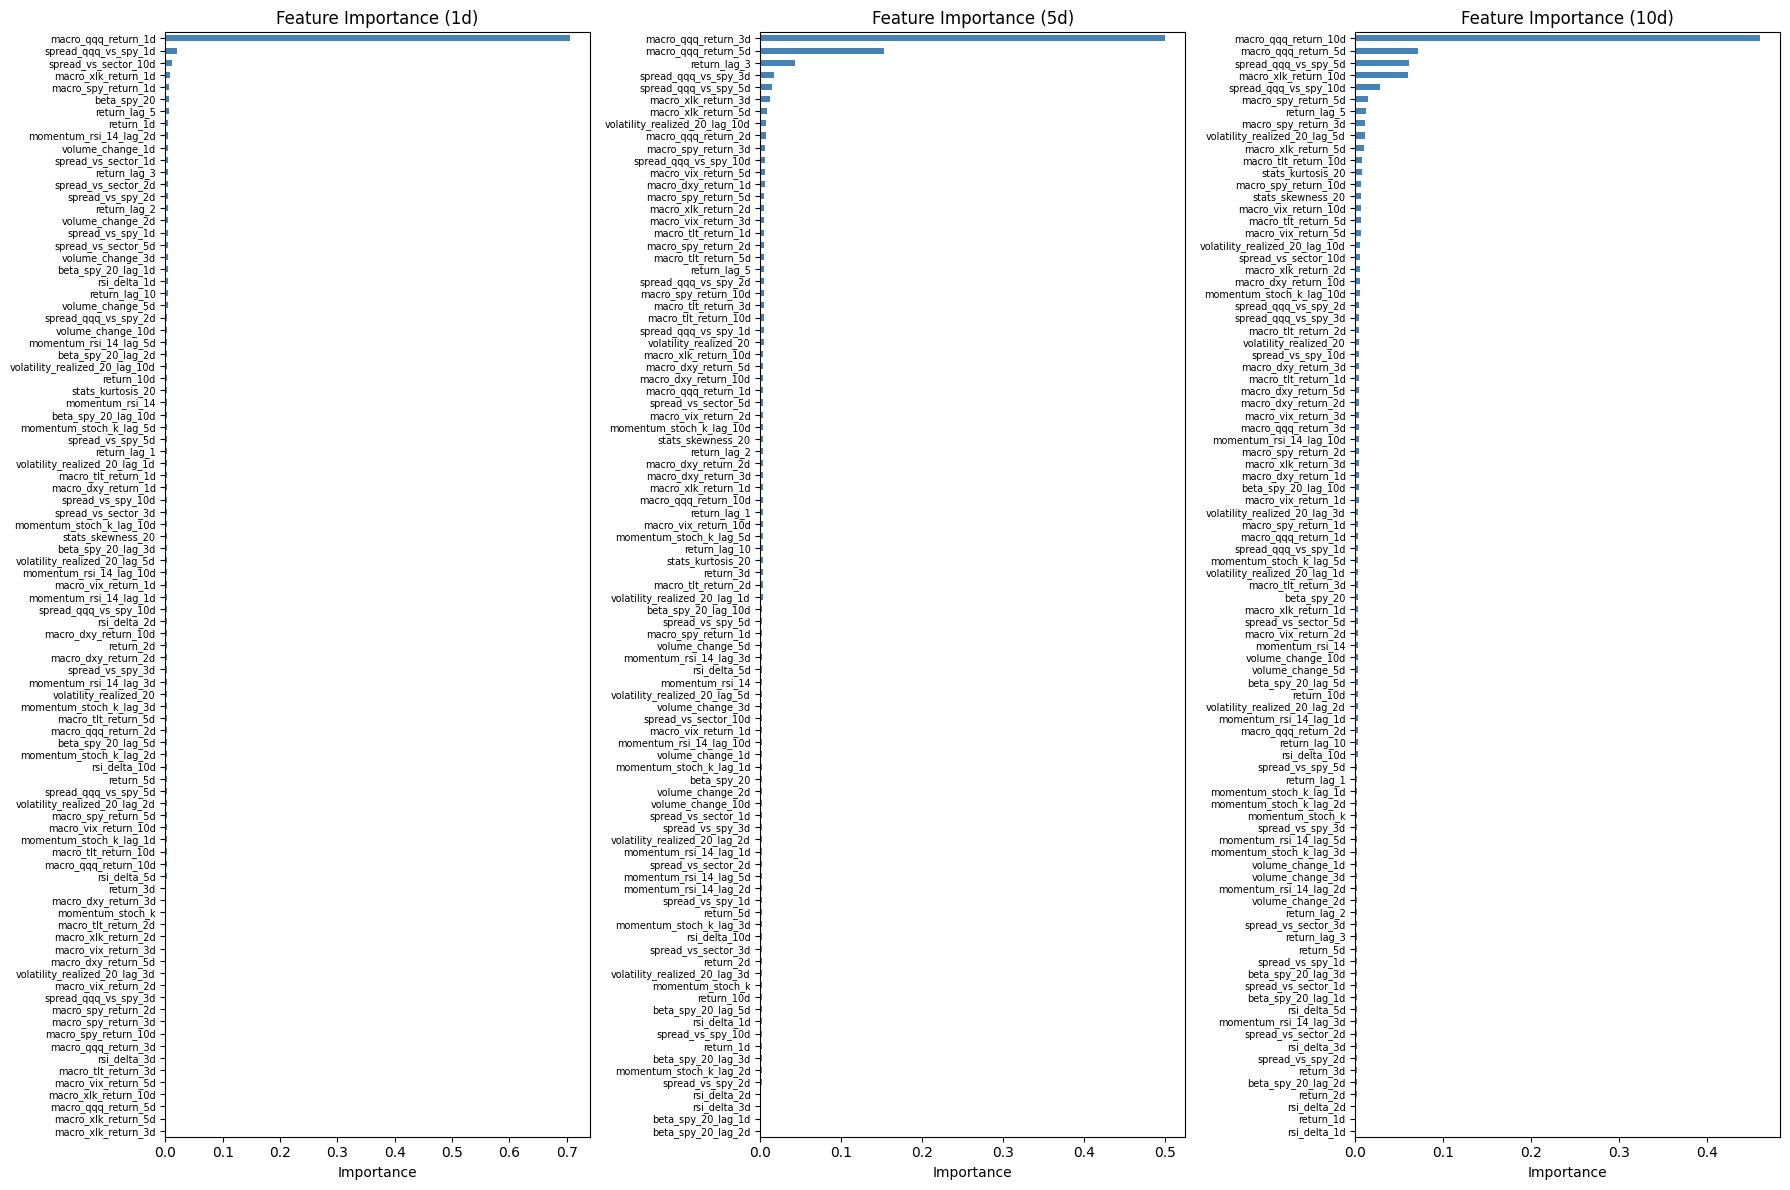


Top 10 Features per Target:

1d:
  macro_qqq_return_1d: 0.7053
  spread_qqq_vs_spy_1d: 0.0204
  spread_vs_sector_10d: 0.0115
  macro_xlk_return_1d: 0.0085
  macro_spy_return_1d: 0.0064
  beta_spy_20: 0.0064
  return_lag_5: 0.0064
  return_1d: 0.0051
  momentum_rsi_14_lag_2d: 0.0050
  volume_change_1d: 0.0050

5d:
  macro_qqq_return_3d: 0.4993
  macro_qqq_return_5d: 0.1533
  return_lag_3: 0.0424
  spread_qqq_vs_spy_3d: 0.0171
  spread_qqq_vs_spy_5d: 0.0143
  macro_xlk_return_3d: 0.0120
  macro_xlk_return_5d: 0.0085
  volatility_realized_20_lag_10d: 0.0075
  macro_qqq_return_2d: 0.0068
  macro_spy_return_3d: 0.0063

10d:
  macro_qqq_return_10d: 0.4605
  macro_qqq_return_5d: 0.0710
  spread_qqq_vs_spy_5d: 0.0612
  macro_xlk_return_10d: 0.0603
  spread_qqq_vs_spy_10d: 0.0278
  macro_spy_return_5d: 0.0139
  return_lag_5: 0.0121
  macro_spy_return_3d: 0.0110
  volatility_realized_20_lag_5d: 0.0106
  macro_xlk_return_5d: 0.0103


In [5]:
# =============================================================================
# Feature Importance (trained on full data for visualization)
# =============================================================================

# Train final models on all data for feature importance analysis
X_all = df_sorted[cols['features']]
models = {}

for target in targets:
    y_all = df_sorted[target]
    rf = RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_leaf=20,
        random_state=42,
        n_jobs=-1
    )
    rf.fit(X_all, y_all)
    models[target] = rf

fig, axes = plt.subplots(1, len(targets), figsize=(6 * len(targets), 12))

for idx, target in enumerate(targets):
    ax = axes[idx]
    rf = models[target]
    importance = pd.Series(rf.feature_importances_, index=X_all.columns).sort_values(ascending=True)
    
    importance.plot(kind='barh', ax=ax, color='steelblue')
    ax.set_xlabel('Importance')
    horizon = target.replace('target_return_', '')
    ax.set_title(f'Feature Importance ({horizon})')
    ax.tick_params(axis='y', labelsize=7)

plt.tight_layout()
plt.show()

# Top 10 features per target
print("\nTop 10 Features per Target:")
print("=" * 60)
for target in targets:
    rf = models[target]
    importance = pd.Series(rf.feature_importances_, index=X_all.columns).sort_values(ascending=False)
    horizon = target.replace('target_return_', '')
    print(f"\n{horizon}:")
    for feat, imp in importance.head(10).items():
        print(f"  {feat}: {imp:.4f}")

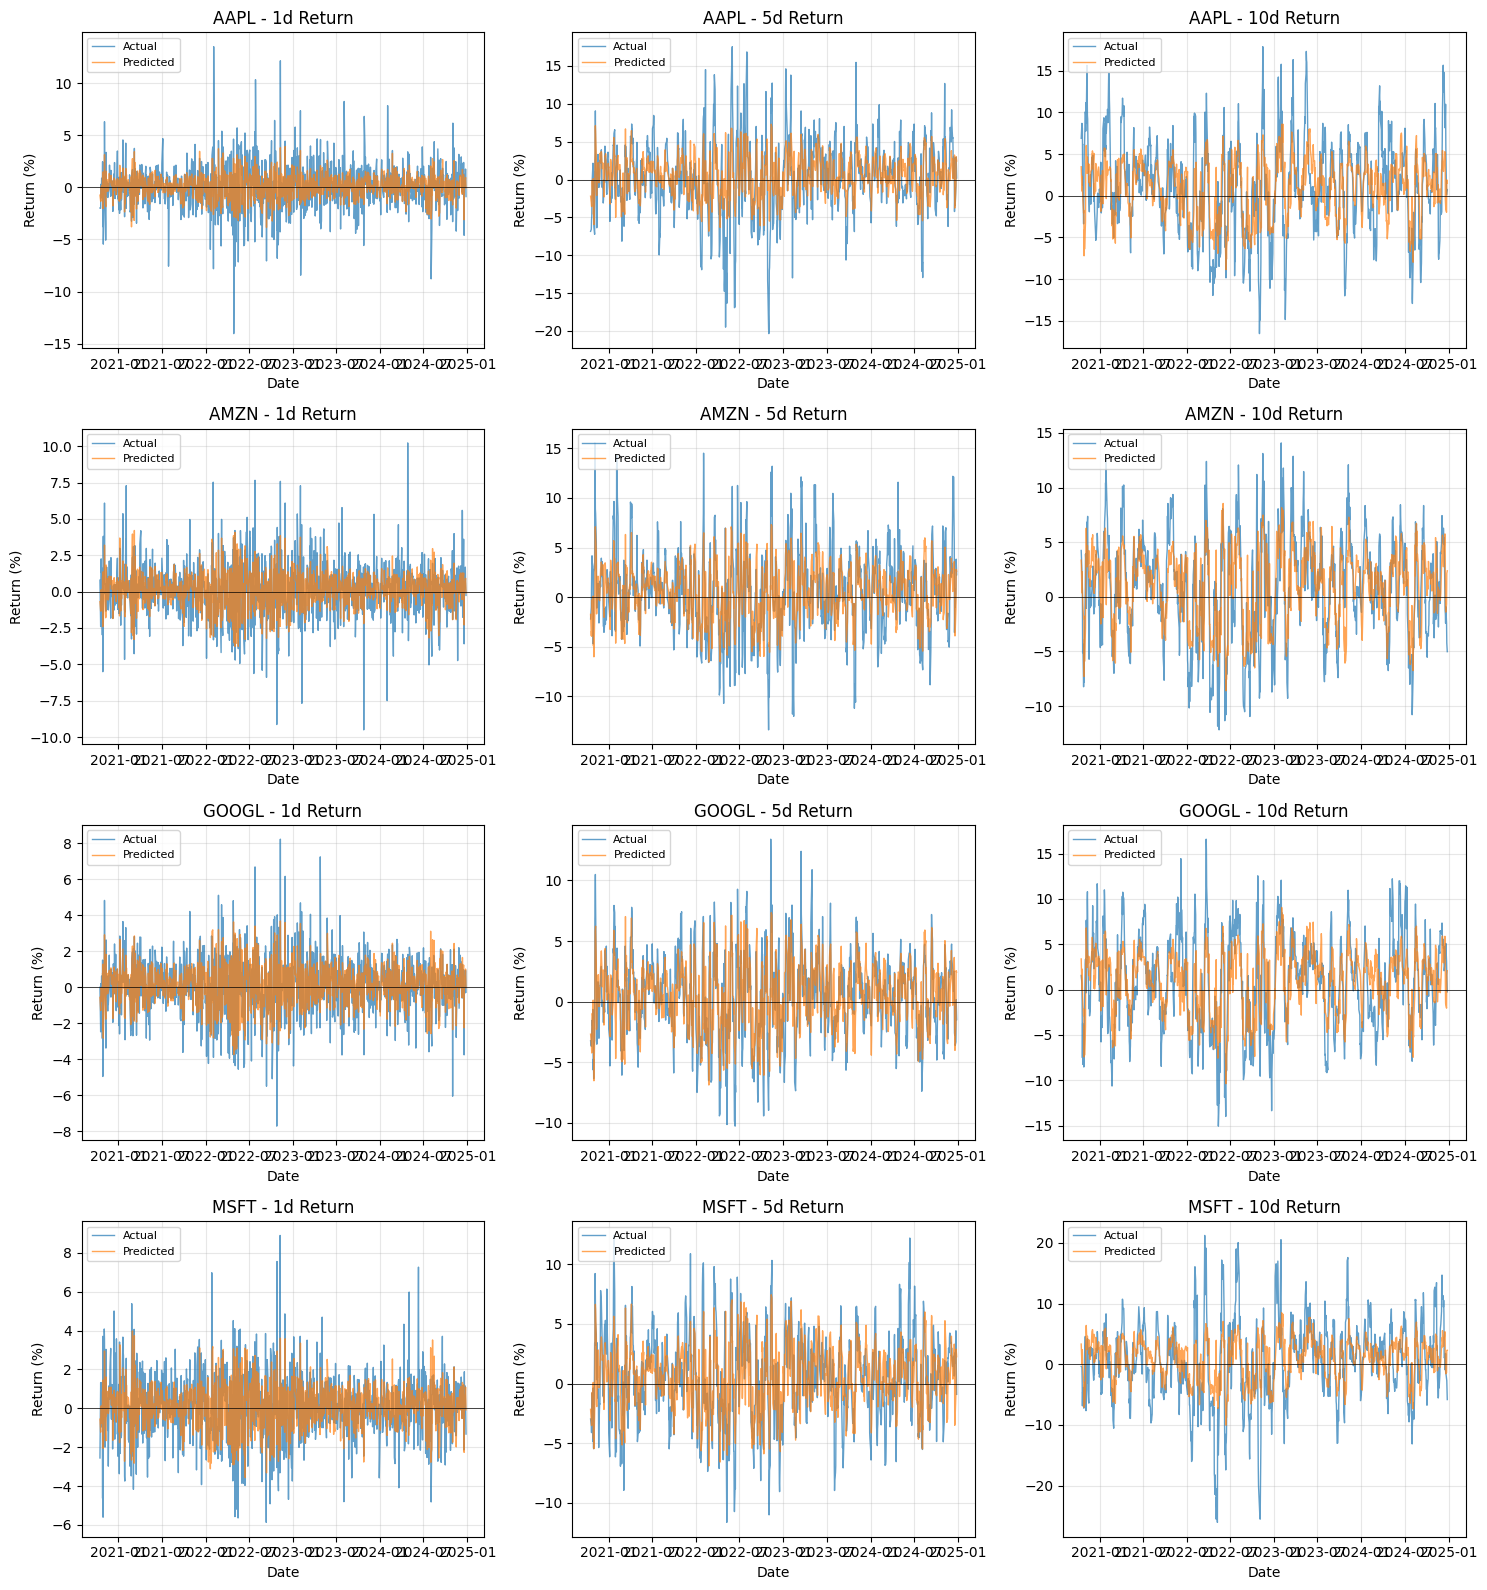


Per-Ticker Walk-Forward Metrics:
--------------------------------------------------------------------------------

AAPL:
  1d: Corr = 0.7632, Direction Acc = 76.97%
  5d: Corr = 0.5971, Direction Acc = 71.09%
  10d: Corr = 0.5486, Direction Acc = 72.32%

AMZN:
  1d: Corr = 0.7319, Direction Acc = 77.63%
  5d: Corr = 0.5880, Direction Acc = 73.18%
  10d: Corr = 0.6330, Direction Acc = 74.60%

GOOGL:
  1d: Corr = 0.8181, Direction Acc = 81.23%
  5d: Corr = 0.6576, Direction Acc = 75.83%
  10d: Corr = 0.5999, Direction Acc = 74.41%

MSFT:
  1d: Corr = 0.0058, Direction Acc = 52.51%
  5d: Corr = 0.6063, Direction Acc = 71.18%
  10d: Corr = 0.5082, Direction Acc = 71.47%


In [6]:
# =============================================================================
# Walk-Forward Results - Actual vs Predicted by Stock
# =============================================================================

tickers = test_results['ticker'].unique()

# Create plot grid: rows = tickers, cols = targets
fig, axes = plt.subplots(len(tickers), len(targets), figsize=(5 * len(targets), 4 * len(tickers)))

if len(tickers) == 1:
    axes = axes.reshape(1, -1)

for row, ticker in enumerate(tickers):
    ticker_data = test_results[test_results['ticker'] == ticker].sort_values('date')
    
    for col, target in enumerate(targets):
        ax = axes[row, col]
        
        actual = ticker_data[target] * 100
        predicted = ticker_data[f'{target}_pred'] * 100
        
        ax.plot(ticker_data['date'], actual, label='Actual', alpha=0.7, linewidth=1)
        ax.plot(ticker_data['date'], predicted, label='Predicted', alpha=0.7, linewidth=1)
        ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        
        ax.set_xlabel('Date')
        ax.set_ylabel('Return (%)')
        horizon = target.replace('target_return_', '')
        ax.set_title(f'{ticker} - {horizon} Return')
        ax.legend(loc='upper left', fontsize=8)
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print per-ticker, per-target metrics
print("\nPer-Ticker Walk-Forward Metrics:")
print("-" * 80)
for ticker in tickers:
    ticker_data = test_results[test_results['ticker'] == ticker]
    print(f"\n{ticker}:")
    for target in targets:
        actual = ticker_data[target]
        predicted = ticker_data[f'{target}_pred']
        corr = actual.corr(predicted)
        direction_acc = ((actual > 0) == (predicted > 0)).mean()
        horizon = target.replace('target_return_', '')
        print(f"  {horizon}: Corr = {corr:.4f}, Direction Acc = {direction_acc:.2%}")